In [1]:
import sys
import os
from tensorflow.python.keras.preprocessing.image import img_to_array, load_img,ImageDataGenerator       # Para preprocesar imágenes
from tensorflow.python.keras import optimizers                                   # Utilizaremos el algoritmo Adam
from tensorflow.python.keras.models import Sequential                            # Modelos secuenciales, capas en orden
from tensorflow.python.keras.layers import Dropout, Flatten, Dense, Activation   # Capas para la ConvNet
from tensorflow.python.keras.layers import Convolution2D, MaxPooling2D           # Capas para la ConvNet
from tensorflow.python.keras import backend as k                                 # Permite gestionar sesiones en background
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

c:\_devtools\python\anaconda3\envs\venvcputf1_13\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\_devtools\python\anaconda3\envs\venvcputf1_13\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\_devtools\python\anaconda3\envs\venvcputf1_13\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\_devtools\python\anaconda3\envs

In [2]:
# Mount the Google Drive to Google Colab
#from google.colab import drive
#drive.mount('/content/gdrive')

In [3]:
currentPath = os.getcwd()


In [4]:
k.clear_session();

train_data = currentPath + os.sep + "data" + os.sep + "data" + os.sep + "train"
test_data = currentPath + os.sep + "data" + os.sep + "data" + os.sep + "test"

# Número de iteraciones sobre todo el dataset de entrenamiento
epochs = 20

# Dimensiones de las imágenes para procesar
n_H, n_W = 100, 100

# Utilizaremos mini-batch
batch_size = 32

# Número de iteraciones que vamos a procesar la información en cada epoca (entrenamiento)
steps = 1000

# Número de iteraciones que vamos a procesar la información en cada epoca (validación)
test_steps = 200

# Definamos la tasa de aprendizaje
learning_rate = 0.05

# Número de clases
class_num = 3

# Estructura de la red neuronal convolucionales
filter_conv1 = 32
size_filter1 = (3,3)

filter_conv2 = 64
size_filter2 = (2,2)

#Usaremos un Max Pooling
size_pool = (2,2)


# 1. Antes de comenzar con el modelo, vamos a preprocesar las imágenes
train_data_generator = ImageDataGenerator(
    rescale = 1./255,          # Normalizar los valores de los pixeles
    shear_range= 0.3,           # Rango del ángulo que podemos inclinar nuestras imágenes
    zoom_range = 0.3,            # Rango del zoom que podemos hacer a nuestras imágenes
    horizontal_flip = True       # Invierte imágenes
)

test_data_generator = ImageDataGenerator(
    rescale = 1./255           # Normalizar los valores de los pixeles
)

# Accede al directorio, preprocesa las imágenes y organiza en mini-batchs
train_images = train_data_generator.flow_from_directory(
    train_data,
    target_size = (n_H, n_W),             # Tamaño de las imágenes
    batch_size = batch_size,              # Tamaño del mini-batch
    class_mode = 'categorical'            # Modelo para clasificación
)

# Accede al directorio, preprocesa las imágenes y organiza en mini-batchs
test_images = test_data_generator.flow_from_directory(
    test_data,
    target_size = (n_H, n_W),
    batch_size = batch_size,
    class_mode = 'categorical'
)




Found 999 images belonging to 3 classes.
Found 2043 images belonging to 3 classes.


In [5]:
# 2. Crear la ConvNet
def createModel():
    cnn = Sequential()
    cnn.add(Convolution2D(filter_conv1, size_filter1, padding="same", input_shape=(n_H, n_W,3), activation="relu"))
    cnn.add(MaxPooling2D(pool_size=size_pool))
    cnn.add(Convolution2D(filter_conv2, size_filter2, padding="same", activation="relu"))
    cnn.add(MaxPooling2D(pool_size=size_pool))
    cnn.add(Flatten())
    cnn.add(Dense(255, activation=None))
    cnn.add(Dropout(0.5))
    cnn.add(Dense(class_num, activation='softmax'))
    
    return cnn

In [6]:
# Definamos donde queremos guardar nuestro modelo y los pesos
dirPath=currentPath + os.sep + "model" + os.sep

In [7]:
# Train model
model = createModel()
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=learning_rate), metrics=['accuracy'])
model.fit(train_images, steps_per_epoch=steps, epochs=epochs, validation_data = test_images, validation_steps=test_steps)


if not os.path.exists(dirPath):
    os.mkdir(dirPath)
    
model.save(dirPath + os.sep + "model.h5")
model.save_weights(dirPath + os.sep + "weights.h5")

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
 9/32 [=======>......................] - ETA: 10s - loss: 7.2686 - acc: 0.5285

KeyboardInterrupt: 

(100, 100, 3)
[[0.387083   0.60709023 0.00582673]]
dog


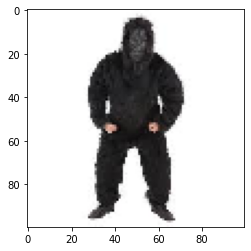

In [8]:
# Evaluate
model = createModel()
model.load_weights(dirPath + os.sep + "weights.h5")

img_path = test_data + os.sep + "gorilla" + os.sep + "18.jpeg"
img = image.load_img(img_path, target_size=(n_H, n_W))

imgArray = image.img_to_array(img)
# Update to 0-1 format
imgArray = imgArray / 255.0
print(imgArray.shape)
plt.imshow(imgArray)
# The modelexspect batches then lets do a batch of 1 
imgArray = np.expand_dims(imgArray, axis=0)

# Predict
classList = os.listdir(test_data)
prediction = model.predict(imgArray)
print(prediction)
prediction = model.predict_classes(imgArray)
print(classList[prediction[0]])

In [9]:
# Lets predict the gorillas
gorillapath = test_data + os.sep + "gorilla" + os.sep
imagesPredict = [f for f in os.listdir(gorillapath) if os.path.isfile(os.path.join(gorillapath,f))]
# print(imagesPredict)

for file in imagesPredict:
    img = load_img(gorillapath + file, target_size=( n_W, n_H))
    tensorImage = img_to_array(img)
    tensorImage = np.expand_dims(tensorImage, axis=0)
    gorillaPrediction = model.predict_classes(tensorImage, batch_size = 1)
    print("file "+ file + " is: " + classList[gorillaPrediction[0]])

file 0.jpeg is: cat
file 1.jpeg is: cat
file 10.jpeg is: cat
file 11.jpeg is: cat
file 12.jpeg is: cat
file 13.jpeg is: gorilla
file 14.jpeg is: cat
file 15.jpeg is: cat
file 16.jpeg is: cat
file 17.jpeg is: gorilla
file 18.jpeg is: cat
file 19.jpeg is: gorilla
file 2.jpeg is: cat
file 20.jpeg is: cat
file 3.jpeg is: cat
file 4.jpeg is: cat
file 5.jpeg is: cat
file 6.jpeg is: cat
file 7.jpeg is: cat
file 8.jpeg is: gorilla
